In [161]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io.fits import getdata

In [162]:
data = getdata('../../data/output.fits', header=False)

In [163]:
mind = data['dec'].min()
maxd = data['dec'].max()
minr = data['ra'].min()
maxr = data['ra'].max()
bind = 2*(maxd - mind)
binr = 2*(maxr - minr)

In [164]:
b = ((data['r'] > 20.0) & (data['r'] <= 20.66))
g = ((data['r'] > 20.66) & (data['r'] <= 21.33))
r = ((data['r'] > 21.33) & (data['r'] <= 22.0))
ran=[[mind,maxd],[minr,maxr]]
bins=[bind,binr]

In [165]:
red, x, y = np.histogram2d(data['dec'][r],data['ra'][r],bins=bins,range=ran)
green, x, y = np.histogram2d(data['dec'][g],data['ra'][g],bins=bins,range=ran)
blue, x, y = np.histogram2d(data['dec'][b],data['ra'][b],bins=bins,range=ran)

In [166]:
rmask = np.where((red < 25.5) | (red > 82.5))
gmask = np.where((green < 26.75) | (green > 76))
bmask = np.where((blue < 24.5) | (blue > 66.75))
red[rmask] = 0
green[gmask] = 0
blue[bmask] = 0

In [167]:
extent = [y[-1],y[0],x[0],x[-1]]
print extent
#longitude_top_left,longitude_top_right,latitude_bottom_left,latitude_top_left
print np.size(red[np.nonzero(red)]) + np.size(blue[np.nonzero(blue)]) + np.size(green[np.nonzero(green)])

[359.99999562263156, 1.3796144287425705e-05, -25.028325857896725, 84.970048677723213]
78464


In [168]:
rgb = np.zeros((bind,binr,3),dtype='uint8')
rgb[:,:,0] = red / (red.max() / 255)
rgb[:,:,1] = green / (green.max() / 255)
rgb[:,:,2] = blue / (blue.max() / 255)
stream = matplotlib.image.FigureImage(rgb)

In [169]:
rgb = np.flipud(rgb)
rgb = np.fliplr(rgb)

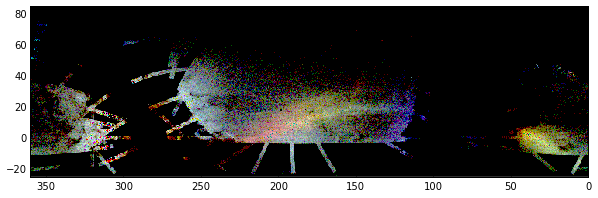

In [170]:
fig,ax=plt.subplots(figsize=(10,10))
im = ax.imshow(rgb,cmap=plt.cm.gray,extent=extent,interpolation='none',origin='upper')



In [171]:
plt.imsave('stream.png',rgb,cmap=plt.cm.gray)